In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import distance
import seaborn as sns

In [24]:
cdf = pd.read_csv("datos_de_clientes.csv", delimiter="\t")
cdf

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


Lograr separar las columnas


In [25]:
edadMinima = cdf['Year_Birth'].max()
edadMinima

1996

Teniendo en cuenta que las campañas pueden estar tambien enfocadas en rangos de edades, el maximo año de nacimiento es 1996, y siendo para este año 2024 dicha persona tendria 28 años, indicando que todos son mayores de edad las propuestas van a estar dirigidas a mayores de edad

In [26]:
proteinas = cdf.iloc[:, [11,12]]
proteinas

,MntMeatProducts,MntFishProducts
0,546,172
1,6,2
2,127,111
3,20,10
4,118,46
...,...,...
2235,182,42
2236,30,0
2237,217,32
2238,214,80


Verifica si las dos columnas son numericas

In [27]:
cdf['MntProteinProducts'] = cdf['MntMeatProducts'] + cdf['MntFishProducts']
cdf

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,MntProteinProducts
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,718
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,8
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,238
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,30
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,224
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,3,11,0,30
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,249
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,294


Crear una columna nueva la cual combine carnes y peces en una de proteinas

In [28]:
proteinas = cdf.iloc[:, [29]]
proteinas

,MntProteinProducts
0,718
1,8
2,238
3,30
4,164
...,...
2235,224
2236,30
2237,249
2238,294


Verificar que existe

In [29]:
proteinas = cdf.pop('MntProteinProducts')
cdf.insert(11, 'MntProteinProducts', proteinas)
proteinas = cdf.iloc[:, [11]]
proteinas

,MntProteinProducts
0,718
1,8
2,238
3,30
4,164
...,...
2235,224
2236,30
2237,249
2238,294


Reposiciona la columna nueva

In [30]:
cdf = cdf.drop(['MntMeatProducts', 'MntFishProducts'], axis=1)
cdf

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


Dropea las columnas de carne y peces por que ya esta el de proteinas

In [31]:
idx_columnas = cdf.columns.tolist()
for idx, nombre_columna in enumerate(idx_columnas):
    print(f"Índice de la columna '{nombre_columna}': {idx}")

Índice de la columna 'ID': 0
Índice de la columna 'Year_Birth': 1
Índice de la columna 'Education': 2
Índice de la columna 'Marital_Status': 3
Índice de la columna 'Income': 4
Índice de la columna 'Kidhome': 5
Índice de la columna 'Teenhome': 6
Índice de la columna 'Dt_Customer': 7
Índice de la columna 'Recency': 8
Índice de la columna 'MntWines': 9
Índice de la columna 'MntFruits': 10
Índice de la columna 'MntProteinProducts': 11
Índice de la columna 'MntSweetProducts': 12
Índice de la columna 'MntGoldProds': 13
Índice de la columna 'NumDealsPurchases': 14
Índice de la columna 'NumWebPurchases': 15
Índice de la columna 'NumCatalogPurchases': 16
Índice de la columna 'NumStorePurchases': 17
Índice de la columna 'NumWebVisitsMonth': 18
Índice de la columna 'AcceptedCmp3': 19
Índice de la columna 'AcceptedCmp4': 20
Índice de la columna 'AcceptedCmp5': 21
Índice de la columna 'AcceptedCmp1': 22
Índice de la columna 'AcceptedCmp2': 23
Índice de la columna 'Complain': 24
Índice de la columna

Conocer los index de las columnas

In [32]:
tiempo_actual = 2024
cdf['Age'] = tiempo_actual - cdf['Year_Birth']
edad = cdf.pop('Age')
cdf.insert(2, 'Age', edad)

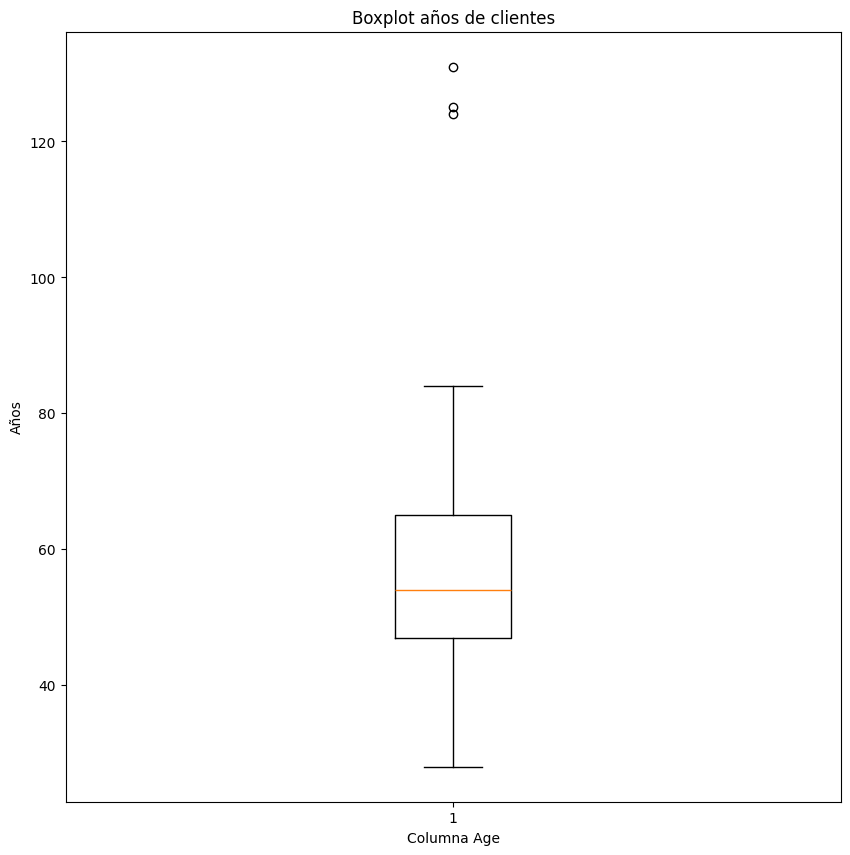

El valor de la mediana es  54.0


In [33]:
edad = cdf.iloc[:, 2]
mediana = np.median(edad)
plt.figure(figsize =(10, 10))
plt.boxplot(edad)
plt.title('Boxplot años de clientes')
plt.ylabel('Años')
plt.xlabel('Columna Age')
plt.show()
print("El valor de la mediana es ", mediana)

Analisis de año de nacimiento de los clientes para encontrar si hay atipicos y la mediana que tiene

In [34]:
cdf = cdf.drop(['Education', 'Dt_Customer', 'Recency', 'Complain', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue'], axis=1)
cdf

,ID,Year_Birth,Age,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntProteinProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
0,5524,1957,67,Single,58138.0,0,0,635,88,718,...,3,8,10,4,0,0,0,0,0,1
1,2174,1954,70,Single,46344.0,1,1,11,1,8,...,2,1,1,2,0,0,0,0,0,0
2,4141,1965,59,Together,71613.0,0,0,426,49,238,...,1,8,2,10,0,0,0,0,0,0
3,6182,1984,40,Together,26646.0,1,0,11,4,30,...,2,2,0,4,0,0,0,0,0,0
4,5324,1981,43,Married,58293.0,1,0,173,43,164,...,5,5,3,6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,57,Married,61223.0,0,1,709,43,224,...,2,9,3,4,0,0,0,0,0,0
2236,4001,1946,78,Together,64014.0,2,1,406,0,30,...,7,8,2,5,0,0,0,1,0,0
2237,7270,1981,43,Divorced,56981.0,0,0,908,48,249,...,1,2,3,13,0,1,0,0,0,0
2238,8235,1956,68,Together,69245.0,0,1,428,30,294,...,2,6,5,10,0,0,0,0,0,0


In [35]:
idx_columnas = cdf.columns.tolist()
for idx, nombre_columna in enumerate(idx_columnas):
    print(f"Índice de la columna '{nombre_columna}': {idx}")

Índice de la columna 'ID': 0
Índice de la columna 'Year_Birth': 1
Índice de la columna 'Age': 2
Índice de la columna 'Marital_Status': 3
Índice de la columna 'Income': 4
Índice de la columna 'Kidhome': 5
Índice de la columna 'Teenhome': 6
Índice de la columna 'MntWines': 7
Índice de la columna 'MntFruits': 8
Índice de la columna 'MntProteinProducts': 9
Índice de la columna 'MntSweetProducts': 10
Índice de la columna 'MntGoldProds': 11
Índice de la columna 'NumDealsPurchases': 12
Índice de la columna 'NumWebPurchases': 13
Índice de la columna 'NumCatalogPurchases': 14
Índice de la columna 'NumStorePurchases': 15
Índice de la columna 'AcceptedCmp3': 16
Índice de la columna 'AcceptedCmp4': 17
Índice de la columna 'AcceptedCmp5': 18
Índice de la columna 'AcceptedCmp1': 19
Índice de la columna 'AcceptedCmp2': 20
Índice de la columna 'Response': 21


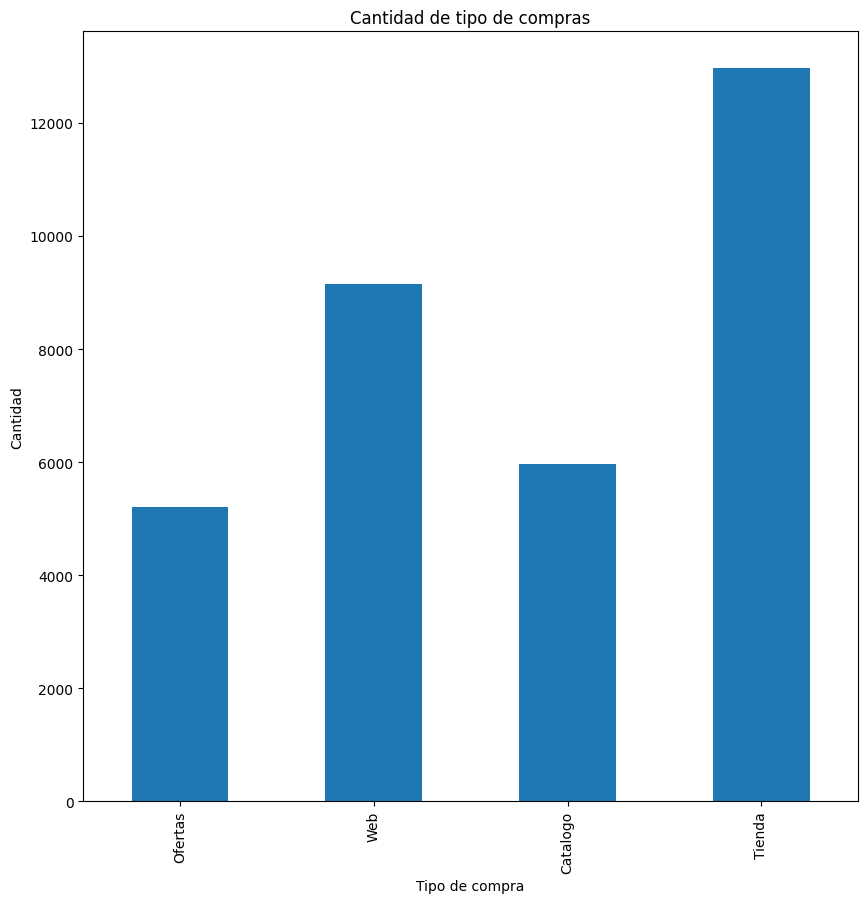

In [36]:
suma_ofertas = cdf['NumDealsPurchases'].sum()
suma_web = cdf['NumWebPurchases'].sum()
suma_catalogo = cdf['NumCatalogPurchases'].sum()
suma_tienda = cdf['NumStorePurchases'].sum()

cantidad_compras = pd.Series([suma_ofertas, suma_web, suma_catalogo, suma_tienda])
plt.figure(figsize=(10,10))
cantidad_compras.plot(kind='bar')
plt.title('Cantidad de tipo de compras')
plt.xlabel('Tipo de compra')
plt.ylabel('Cantidad')
plt.xticks(range(len(cantidad_compras)), ['Ofertas', 'Web', 'Catalogo', 'Tienda'])
plt.show()

#### Normalización de los datos


In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

columns_to_normalize_range = ['MntWines', 'MntFruits', 'MntProteinProducts']
columns_to_normalize_z = ['Income']

scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

cdf[columns_to_normalize_z] = scaler.fit_transform(cdf[columns_to_normalize_z])

cdf[columns_to_normalize_range] = min_max_scaler.fit_transform(cdf[columns_to_normalize_range])

display(cdf)

,ID,Year_Birth,Age,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntProteinProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
0,5524,1957,67,Single,0.234063,0,0,0.425318,0.442211,0.415411,...,3,8,10,4,0,0,0,0,0,1
1,2174,1954,70,Single,-0.234559,1,1,0.007368,0.005025,0.004056,...,2,1,1,2,0,0,0,0,0,0
2,4141,1965,59,Together,0.769478,0,0,0.285332,0.246231,0.137312,...,1,8,2,10,0,0,0,0,0,0
3,6182,1984,40,Together,-1.017239,1,0,0.007368,0.020101,0.016802,...,2,2,0,4,0,0,0,0,0,0
4,5324,1981,43,Married,0.240221,1,0,0.115874,0.216080,0.094438,...,5,5,3,6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,57,Married,0.356642,0,1,0.474883,0.216080,0.129200,...,2,9,3,4,0,0,0,0,0,0
2236,4001,1946,78,Together,0.467539,2,1,0.271936,0.000000,0.016802,...,7,8,2,5,0,0,0,1,0,0
2237,7270,1981,43,Divorced,0.188091,0,0,0.608171,0.241206,0.143685,...,1,2,3,13,0,1,0,0,0,0
2238,8235,1956,68,Together,0.675388,0,1,0.286671,0.150754,0.169757,...,2,6,5,10,0,0,0,0,0,0


In [ ]:
def DBSCAN(D, epsilon, minpts):
    
    def find_distance(x):
        return distance.squareform(distance.pdist(x))

    def find_neighbors(x, epsilon):
        return np.where(x <= epsilon)[0]

    def expand_cluster(neighbors, cluster, labels, minpts):
        for neighbor in neighbors:
            if labels[neighbor] == -1:
                labels[neighbor] = cluster
                neighbor_neighbors = find_neighbors(dist_matrix[neighbor], epsilon)
                if len(neighbor_neighbors) >= minpts:
                    labels = expand_cluster(neighbor_neighbors, cluster, labels, minpts)
        return labels

    dist_matrix = find_distance(D)
    cluster = -1
    n_obs = D.shape[0]
    labels = np.full(n_obs, -1)
    for i in range(n_obs):
        if labels[i] == -1:
            neighbors = find_neighbors(dist_matrix[i], epsilon)
            if len(neighbors) > minpts:
                cluster += 1
                labels[i] = cluster
                labels = expand_cluster(neighbors, cluster, labels, minpts)
            else:
                labels[i] = -1  
    return labels